## Easy Stacked Charts with Matplotlib and Pandas
### https://pstblog.com/2016/10/04/stacked-charts
"the default Pandas bar plotting function requires the data to be oriented in rows with a unique column for each layer"

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
# Obtener datos
url = 'https://www.juntadeandalucia.es/institutodeestadisticaycartografia/badea/stpivot/stpivot/Print?cube=85977e77-d23f-479e-aa98-72c5c6f3808f&type=3&foto=si&ejecutaDesde=&codConsulta=38228&consTipoVisua=JP'
fields = ['Fecha', 'Territorio', 'Medida', 'Valor']
df = pd.read_csv(url, delimiter=';', usecols=fields)

In [3]:
# Convertir fecha
df['Fecha'] = pd.to_datetime(df.Fecha, dayfirst=True)
# Ordenar los datos
df.sort_values(by=['Territorio', 'Medida', 'Fecha'], inplace=True)

In [4]:
# Calcular el porcentaje de cambio con respecto al día anterior
df['pctChange'] = df.groupby(['Territorio', 'Medida'])['Valor'].pct_change()*100

In [5]:
# ajustes para los gráficos
dfG_columns = ['Hospitalizados', 'Total UCI', 'Fallecimientos']
dfG_colors = ['yellow', 'orange', 'red']

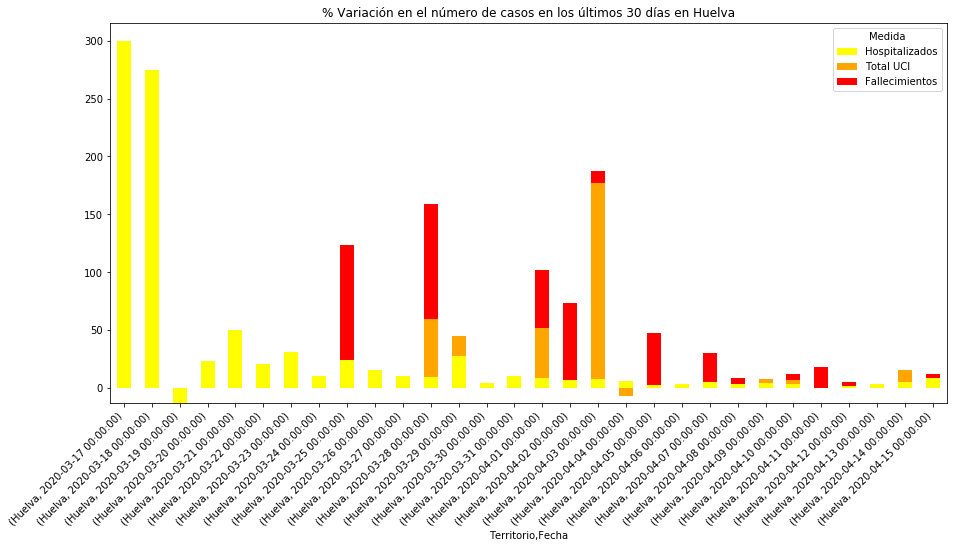

In [6]:
# Datos de los últimos x días para una lista de territorios
dias = 30
fTerr = ['Huelva']
fFecha = pd.date_range(end=df.Fecha.max(), periods=dias)
filtro = df['Territorio'].isin(fTerr) & df['Fecha'].isin(fFecha) & df['Medida'].isin(dfG_columns)
dfG = df[filtro].pivot_table(values='pctChange', index=['Territorio', 'Fecha'], columns='Medida')[dfG_columns]

# plot data
dfG.plot.bar(stacked=True, color=dfG_colors, figsize=(15,7), title='% Variación en el número de casos en los últimos ' + str(dias) + ' días en ' + fTerr[0])
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light'  
)
plt.show()

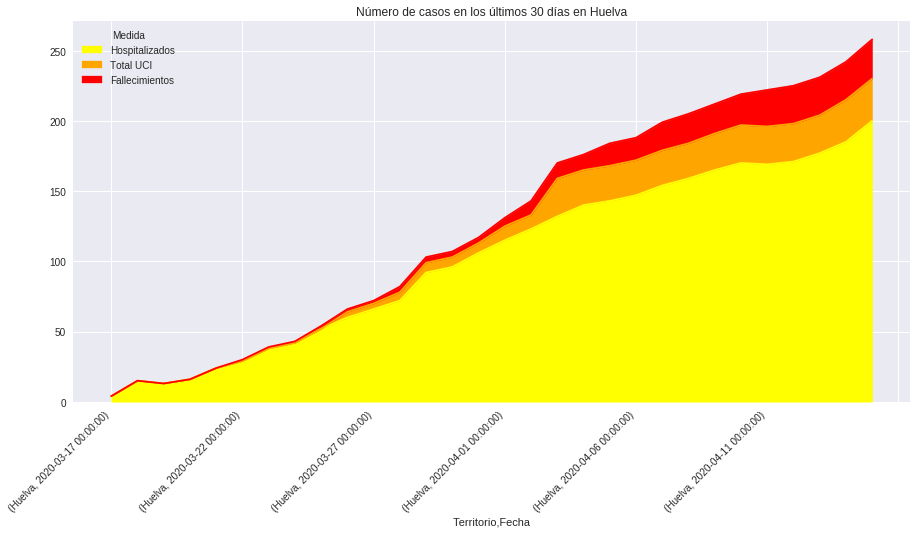

In [7]:
# Data
dias = 30
fTerr = ['Huelva']
fFecha = pd.date_range(end=df.Fecha.max(), periods=dias)
filtro = df['Territorio'].isin(fTerr) & df['Fecha'].isin(fFecha) & df['Medida'].isin(dfG_columns)
dfG = df[filtro].pivot_table(values='Valor', index=['Territorio', 'Fecha'], columns='Medida')[dfG_columns]

# Plot
plt.style.use('seaborn')
dfG.plot.area(color=dfG_colors, figsize=(15,7), title='Número de casos en los últimos ' + str(dias) + ' días en ' + fTerr[0])
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light'  
)

plt.show()